<a href="https://colab.research.google.com/github/AditiKanwar/IR-Project/blob/main/NewsClassificationAndSummarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

**NORMALIZATION**

- Exapnd Contractions
- Remove Stopwords
- Lemmatization
- Removal of Special Charachters

In [ ]:

#importing the neccessary libraries

import re
import nltk
import string
from nltk.corpus import wordnet as wn
nltk.download('stopwords')

#Getting list of stop words

stopword_list = nltk.corpus.stopwords.words('english')

#function for removing stopwords
def removeStopwords(text):
    filtered_words = [word for word in nltk.word_tokenize(text) if word not in stopword_list and word.isalpha()]
    filtered_text = ' '.join(filtered_words)    
    return filtered_text
    
#Function for expanding the contraction

def expandContractions(text):
    
    contractionsPattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expandMatch(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expandedContraction = CONTRACTION_MAP.get(match)\
                                if CONTRACTION_MAP.get(match)\
                                else CONTRACTION_MAP.get(match.lower())                       
        expandedContraction = first_char+expandedContraction[1:]
        return expandedContraction
        
    expandedText = contractionsPattern.sub(expandMatch, text)
    expandedText = re.sub("'", "", expandedText)
    return expandedText


#Function for removing special characters
def removeSpecialCharacters(text):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filteredTokens = filter(None, [pattern.sub('', word) for word in nltk.word_tokenize(text)])
    filteredText = ' '.join(filteredTokens)
    return filteredText

#lemmatization

lemmatizer = nltk.stem.WordNetLemmatizer()

def custom_tokenize(text):
    return text.split()
    
# lemmatize text    
def lemmatizeText(text):
    #posTaggedText = posTagText(text)
    list1 = nltk.word_tokenize(text)
    lemmatizedTokens = [lemmatizer.lemmatize(word)                   
                         for word in list1]
    lemmatizedText = ' '.join(lemmatizedTokens)
    return lemmatizedText

#Normalization consist of following steps :
#- Exapnd Contractions
#- Remove Stopwords
#- Lemmatization
#- Removal of Special Charachters

def normalizeCorpus(text):
    
    normalized_text =[]
    if(isinstance(text,list)):
        for sentence in text:
            sentence = expandContractions(sentence)
            sentence = removeStopwords(sentence)
            #print("type " , type(sentence))
            sentence = lemmatizeText(sentence)
            sentence = removeSpecialCharacters(sentence)
            normalized_text.append(sentence)
        return normalized_text
    else:        
        text = expandContractions(text)
        text = removeStopwords(text)
        #print("type " , type(text))
        text = lemmatizeText(text)
        text = removeSpecialCharacters(text)
        return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**NEWS CLASSIFICATION**

In [ ]:
#import libraries

import pandas as pd

from sklearn import preprocessing 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.2.5.


In [ ]:
nltk.download('punkt')

#Applying normalization on data
dataset = pd.read_csv('/content/drive/MyDrive/newsdataset.csv')


dataset['length'] =dataset['CONTENT'].apply(len)
dataset = dataset[dataset['length']>15]
#dataset=dataset.iloc[1:1000]
print(dataset.size)
dataset.info()

dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
142590
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28518 entries, 0 to 28517
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URL       28518 non-null  object
 1   CATEGORY  28518 non-null  object
 2   CONTENT   28518 non-null  object
 3   SUMMARY   28518 non-null  object
 4   length    28518 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


,URL,CATEGORY,CONTENT,SUMMARY,length
0,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,business,Paris/London/Atlanta: Federal Reserve Bank of ...,Paris/London/Atlanta: Federal Reserve Bank of ...,2657
1,http://www.moneynews.com/Economy/federal-reser...,business,Severe winter weather likely affected U.S. job...,Severe winter weather likely affected U.S. job...,1268
2,http://www.marketwatch.com/story/feds-plosser-...,business,PARISn — The Federal Reserve may have to accel...,“We must back away from increasing the degree ...,1782
3,http://www.fxstreet.com/news/forex-news/articl...,business,FXStreet (Łódź) - Philadelphia Fed President C...,FXStreet (Łódź) - Philadelphia Fed President C...,774
4,http://www.iii.co.uk/news-opinion/reuters/news...,business,The value of international investments may be ...,The value of international investments may be ...,801


In [ ]:
# Encode labels in column 'category'.
label_encoder = preprocessing.LabelEncoder() 
dataset['CATEGORY']= label_encoder.fit_transform(dataset['CATEGORY']) 

In [ ]:
#Sampling the data

df0 = dataset[dataset.CATEGORY==0]
df1 = dataset[dataset.CATEGORY==1]
df2 = dataset[dataset.CATEGORY==2]
df3 = dataset[dataset.CATEGORY==3]

samples = dataset.CATEGORY.value_counts().tolist()



df0 = resample(df0, 
                   replace=True,   
                   n_samples=samples[0], 
                   random_state=1130)
df1 = resample(df1, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df2 = resample(df2, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df3 = resample(df3, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)


df_sampled = pd.concat([df0.head(500),df1.head(500),df2.head(500),df3.head(500)])

dataset= df_sampled
print(dataset.shape)

(2000, 5)


In [ ]:
print(dataset.shape)
dataset['CATEGORY'].unique()

(2000, 5)


array([0, 1, 2, 3])

In [ ]:
nltk.download('wordnet')
dataset['CONTENT_FILTERED'] = dataset['CONTENT'].apply(normalizeCorpus)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
dataset.drop('length', axis=1, inplace=True)
dataset.head()


,URL,CATEGORY,CONTENT,SUMMARY,CONTENT_FILTERED
4967,http://in.reuters.com/article/2014/03/31/swiss...,0,* Swiss competition body opens probe into eigh...,“Evidence exists that these banks colluded to ...,Swiss competition body open probe eight bank F...
7176,http://www.thecourier.com.au/story/2203075/aus...,0,"news, latest-news\n\nAustralian shares trimmed...","news, latest-newsAustralian shares trimmed the...",news Australian share trimmed loss close sligh...
1784,http://washington.cbslocal.com/2014/03/13/ther...,0,Indonesian Air Force officials at Medan city m...,(credit: ATAR/AFP/Getty Images)— Search planes...,Indonesian Air Force official Medan city milit...
708,http://www.fool.com/investing/general/2014/03/...,0,As news out of Ukraine seemed to drift to the ...,2 economy said exports fell unexpectedly in Fe...,As news Ukraine seemed drift periphery stock e...
2717,http://www.recorder.ca/2014/03/26/planes-ships...,0,PERTH – High winds and icy weather halted the ...,"""We detected floating objects, perhaps more th...",PERTH High wind icy weather halted air search ...


**Classification using Multinomial Naive Bayes and Bag of words features**

In [ ]:
#Feature Extraction using bag of words

trainingSet, testSet, trainingLabels, testLabels = train_test_split(dataset["CONTENT_FILTERED"], dataset["CATEGORY"], test_size=0.33, random_state=42)
vectorizer = CountVectorizer(min_df =2, ngram_range=(2,2))
bowTrainFeatures = vectorizer.fit_transform(trainingSet)
bowTestFeatures = vectorizer.transform(testSet)

MultiNomial Naive Bayes using Bag of words

Accuracy:  86.36363636363636 

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       166
           1       0.87      0.96      0.91       159
           2       0.95      0.84      0.89       159
           3       0.83      0.84      0.84       176

    accuracy                           0.86       660
   macro avg       0.87      0.86      0.86       660
weighted avg       0.87      0.86      0.86       660



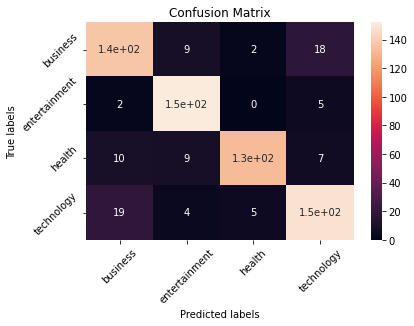

In [ ]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(bowTrainFeatures,trainingLabels)

predictions_mnb = mnb.predict(bowTestFeatures)

print("MultiNomial Naive Bayes using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_mnb, testLabels)*100,"\n")

print("Classification Report\n")
print(classification_report(testLabels,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(testLabels, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

In [ ]:
#dataset.drop('URL', axis=1, inplace=True)
df = dataset.copy(deep = True)
print(df.shape)

(2000, 5)


In [ ]:
df.head()

,URL,CATEGORY,CONTENT,SUMMARY,CONTENT_FILTERED
4967,http://in.reuters.com/article/2014/03/31/swiss...,0,* Swiss competition body opens probe into eigh...,“Evidence exists that these banks colluded to ...,Swiss competition body open probe eight bank F...
7176,http://www.thecourier.com.au/story/2203075/aus...,0,"news, latest-news\n\nAustralian shares trimmed...","news, latest-newsAustralian shares trimmed the...",news Australian share trimmed loss close sligh...
1784,http://washington.cbslocal.com/2014/03/13/ther...,0,Indonesian Air Force officials at Medan city m...,(credit: ATAR/AFP/Getty Images)— Search planes...,Indonesian Air Force official Medan city milit...
708,http://www.fool.com/investing/general/2014/03/...,0,As news out of Ukraine seemed to drift to the ...,2 economy said exports fell unexpectedly in Fe...,As news Ukraine seemed drift periphery stock e...
2717,http://www.recorder.ca/2014/03/26/planes-ships...,0,PERTH – High winds and icy weather halted the ...,"""We detected floating objects, perhaps more th...",PERTH High wind icy weather halted air search ...


**Summarization using Lex Rank Summarizer**

In [ ]:
!pip install sumy
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.1 MB/s 
     |████████████████████████████████| 10.1 MB 29.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=a6e21f0e98b076ff344b33df24c58c95e9940fef10968a505438962beb51721b
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=3d080a7e2c3d74b2bbd37b8c2d8ef197b0fc6697284994dfded6a2acec12556d
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built breadability pycountry


In [ ]:
def summarize(text):    
    SENTENCES_COUNT = 3
    language = 'english'

    parser = PlaintextParser.from_string(text, Tokenizer(language))
    stemmer = Stemmer(language)
    
    summarizer = LexRankSummarizer(stemmer)

    summarizer.stop_words = get_stop_words(language)
    
    summary = []
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))

    return " ".join(summary)

In [ ]:
dataset["GeneratedSummary"] = dataset["CONTENT_FILTERED"].apply(summarize)
dataset.head()

,URL,CATEGORY,CONTENT,SUMMARY,CONTENT_FILTERED,GeneratedSummary
4967,http://in.reuters.com/article/2014/03/31/swiss...,0,* Swiss competition body opens probe into eigh...,“Evidence exists that these banks colluded to ...,Swiss competition body open probe eight bank F...,Swiss competition body open probe eight bank F...
7176,http://www.thecourier.com.au/story/2203075/aus...,0,"news, latest-news\n\nAustralian shares trimmed...","news, latest-newsAustralian shares trimmed the...",news Australian share trimmed loss close sligh...,news Australian share trimmed loss close sligh...
1784,http://washington.cbslocal.com/2014/03/13/ther...,0,Indonesian Air Force officials at Medan city m...,(credit: ATAR/AFP/Getty Images)— Search planes...,Indonesian Air Force official Medan city milit...,Indonesian Air Force official Medan city milit...
708,http://www.fool.com/investing/general/2014/03/...,0,As news out of Ukraine seemed to drift to the ...,2 economy said exports fell unexpectedly in Fe...,As news Ukraine seemed drift periphery stock e...,As news Ukraine seemed drift periphery stock e...
2717,http://www.recorder.ca/2014/03/26/planes-ships...,0,PERTH – High winds and icy weather halted the ...,"""We detected floating objects, perhaps more th...",PERTH High wind icy weather halted air search ...,PERTH High wind icy weather halted air search ...
